# Análise Exploratória dos Dados - Dataset de Discursos Parlamentares sobre o Tema Posse e Porte de Armas de Fogo (2023 - 2025)
|Nome | RA |
| --- | --- |
| João Pedro Rodrigues Vieira | 10403595 |

## Sobre o Conteúdo
É apresentada uma leitura de informações pertinentes ao dataset construído por meio do pipeline. Aqui, serão encontradas contabilizações que ajudam a visualizar a dimensionalidade dos discursos coletados, como a quantidade de partidos diferentes por discurso, como também em quais partidos e espectros políticos os deputados oradores estão situados.

### Histórico de Atualizações
- (28/09/2025) João Pedro R. Vieira: adicionar breve análise do conteúdo extraído;
- (22/11/2025) João Pedro R. Vieira: remover duplicidade do partido UNIÃO.

In [1]:
import json;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [2]:
## 2. Leitura dos Datasets
def load_json(file_path):
    """
    Função para carregar um arquivo JSON e retornar os dados como um dicionário.
    Args:
        file_path (str): Caminho para o arquivo JSON.
    Returns:
        dict: Dados carregados do arquivo JSON.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file);
    return data;

In [3]:
# Lista de textos em português
data = load_json("../dataset/discursos-armamento-2023-2025.json");
df = pd.DataFrame(data["data"]);
df.head()

,idDiscurso,idEvento,descricaoTipoEvento,idDeputado,nomeDeputado,uriDeputado,siglaUf,idLegislatura,siglaPartido,uriPartido,tipoDiscurso,faseEvento,dataHoraInicio,keywords,sumario,transcricao,espectro_politico,posicionamento_ideologico
0,aa6dddcd-b4d4-4c09-b401-3c23b1a100c2,71506,Sessão Deliberativa,73579,Alberto Fraga,https://dadosabertos.camara.leg.br/api/v2/depu...,DF,57,PL,https://dadosabertos.camara.leg.br/api/v2/part...,BREVES COMUNICAÇÕES,Breves Comunicações,2023-12-06T16:44,"Tráfico internacional de arma de fogo,Polícia ...","O Deputado elogiou a Operação Dakovo, que desm...",O SR. ALBERTO FRAGA (PL - DF. Sem revisão do o...,Centro-direita,Conservador
1,0bbb5797-9b23-4ec4-82a4-b9cd5987296a,71506,Sessão Deliberativa,74171,Chico Alencar,https://dadosabertos.camara.leg.br/api/v2/depu...,RJ,57,PSOL,https://dadosabertos.camara.leg.br/api/v2/part...,PELA ORDEM,Ordem do Dia,2023-12-06T22:40,"Federação PSOL REDE,favorável,Estatuto do Desa...","O Deputado, em nome da Federação PSOL REDE, re...",O SR. CHICO ALENCAR (Bloco/PSOL - RJ. Pela ord...,Esquerda,Progressista
2,b2072414-fa5a-4b5b-a7b1-c26c1efdecff,71506,Sessão Deliberativa,156190,Marcel van Hattem,https://dadosabertos.camara.leg.br/api/v2/depu...,RS,57,Novo,https://dadosabertos.camara.leg.br/api/v2/part...,COMO LÍDER,Ordem do Dia,2023-12-06T23:28,"Requerimento de urgência,Projeto de decreto le...",O Deputado expressou sua insatisfação pela der...,O SR. MARCEL VAN HATTEM (NOVO - RS. Como Líder...,Direita,Conservador
3,f5257f2f-b51c-4cb7-bdb0-696df39f0180,71506,Sessão Deliberativa,160575,Erika Kokay,https://dadosabertos.camara.leg.br/api/v2/depu...,DF,57,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PELA ORDEM,Ordem do Dia,2023-12-06T22:52,"Governo,Presidente da República,redução,Assass...",A Deputada enfatizou a importância da verdade ...,A SRA. ERIKA KOKAY (Bloco/PT - DF. Pela ordem....,Esquerda,Progressista
4,f5257f2f-b51c-4cb7-bdb0-696df39f0180,71506,Sessão Deliberativa,160575,Erika Kokay,https://dadosabertos.camara.leg.br/api/v2/depu...,DF,57,PT,https://dadosabertos.camara.leg.br/api/v2/part...,PELA ORDEM,Ordem do Dia,2023-12-06T22:24,"Projeto de decreto legislativo,sustação,Decret...",A Deputada manifestou sua preocupação com a te...,A SRA. ERIKA KOKAY (Bloco/PT - DF. Pela ordem....,Esquerda,Progressista


In [4]:
# Normalizando a siglas de partidos políticos
df["siglaPartido"] = df["siglaPartido"].apply(str.upper);
df["siglaPartido"].unique()

array(['PL', 'PSOL', 'NOVO', 'PT', 'REPUBLICAN', 'UNIÃO', 'PP', 'MDB',
       'PSD'], dtype=object)

In [5]:
print("Neste dataset, foram extraídas as seguintes informações:");

speeches_count = df["idDiscurso"].count();
print(f"Quantidade de discursos: {speeches_count}");

parties_count = df["siglaPartido"].nunique();
print(f"Quantidade de partidos diferentes: {parties_count}");

political_spectrum_count = df["espectro_politico"].nunique();
print(f"Quantidade de espectros políticos diferentes: {political_spectrum_count}");

ideological_position_count = df["posicionamento_ideologico"].nunique();
print(f"Quantidade de posicionamentos ideológicos diferentes: {ideological_position_count}");

# Contagem de discursos por espectro político
speeches_by_spectrum = df["espectro_politico"].value_counts();
print("\nContagem de discursos por espectro político:");
print(speeches_by_spectrum);

Neste dataset, foram extraídas as seguintes informações:
Quantidade de discursos: 55
Quantidade de partidos diferentes: 9
Quantidade de espectros políticos diferentes: 4
Quantidade de posicionamentos ideológicos diferentes: 3

Contagem de discursos por espectro político:
espectro_politico
Centro-direita    32
Esquerda          13
Centro             6
Direita            4
Name: count, dtype: int64


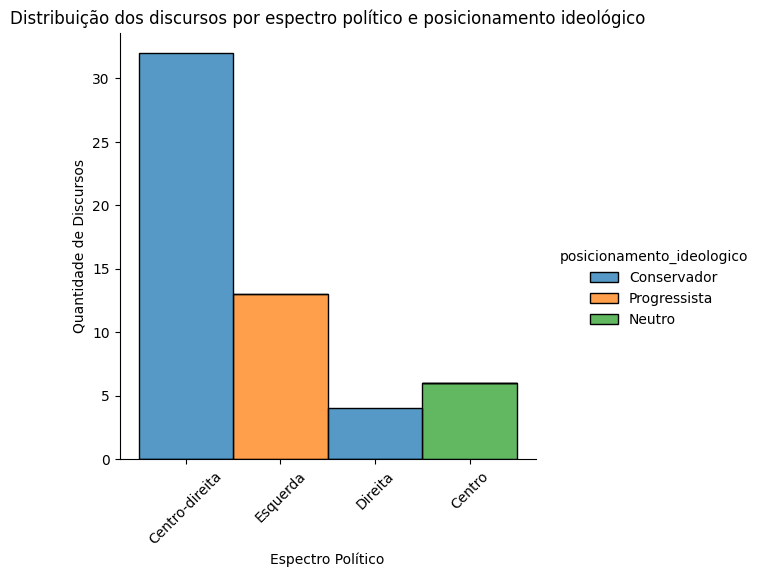

In [6]:
sns.displot(data=df, x="espectro_politico", hue="posicionamento_ideologico", multiple="stack");
plt.title("Distribuição dos discursos por espectro político e posicionamento ideológico");
plt.xlabel("Espectro Político");
plt.ylabel("Quantidade de Discursos");
plt.xticks(rotation=45);
plt.show();

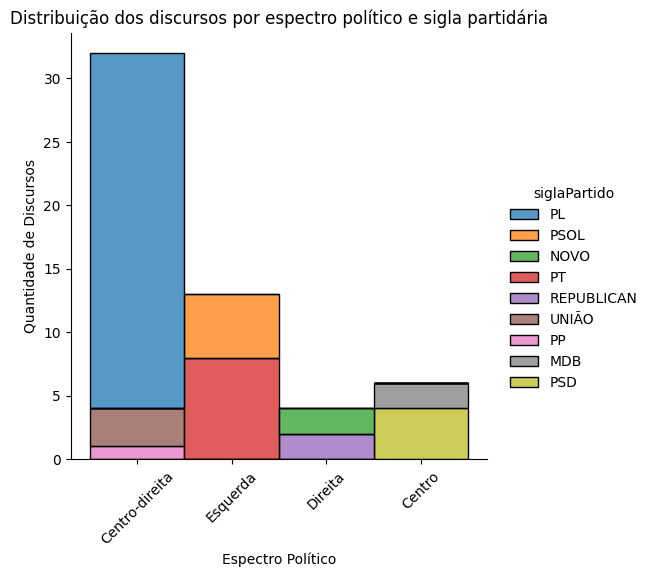

In [7]:
sns.displot(data=df, x="espectro_politico", hue="siglaPartido", multiple="stack");
plt.title("Distribuição dos discursos por espectro político e sigla partidária");
plt.xlabel("Espectro Político");
plt.ylabel("Quantidade de Discursos");
plt.xticks(rotation=45);
plt.show();